In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

plt.rcParams['font.sans-serif']=['SimHei']

In [3]:
data = pd.read_csv('Indicators.csv')
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,69.394718,435.219125,135.503631,64.146263,60.767462,58.987113,56.977272,NaN,NaN,NaN
1,Afghanistan,AFG,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,25.475205,27.692307,31.829268,25.961536,23.499999,19.370861,...,34.950802,38.704176,47.486164,44.107661,40.512821,41.663503,36.823487,41.403018,42.772365,NaN
2,Angola,AGO,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,80.265399,78.305971,74.039740,69.181548,60.221450,46.365701,40.178454,40.186263,54.435425,NaN
3,Albania,ALB,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.895392,56.993840,55.601620,56.620546,57.913944,54.887482,55.904248,58.310662,58.550174,NaN
4,Andorra,AND,Merchandise trade (% of GDP),TG.VAL.TOTL.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,49.359611,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Unnamed: 63'],
      dtype='object')

In [5]:
data.drop(columns='Unnamed: 63',inplace=True)

In [6]:
new_data = pd.DataFrame()

In [7]:
Country_Name = ['United States','Japan','China','Australia','United Kingdom','India','Korea, Rep.']
New_Country_Name = ['United_States','Japan','China','Australia','United_Kingdom','India','Korea']

In [8]:
for i in zip(Country_Name,New_Country_Name):
    print(i)

('United States', 'United_States')
('Japan', 'Japan')
('China', 'China')
('Australia', 'Australia')
('United Kingdom', 'United_Kingdom')
('India', 'India')
('Korea, Rep.', 'Korea')


In [9]:
for country_name in zip(Country_Name,New_Country_Name):
    print(country_name)
    new_data[country_name[1]] = data[data['Country Name'] == country_name[0]].iloc[:,4:].values.T.reshape(59,)

('United States', 'United_States')
('Japan', 'Japan')
('China', 'China')
('Australia', 'Australia')
('United Kingdom', 'United_Kingdom')
('India', 'India')
('Korea, Rep.', 'Korea')


In [37]:
def animate(i):
    for rect, yi in zip(rects, new_data.values[i]):
        rect.set_height(yi)
    return rects

def animate2(i):
    for rect, yi in zip(rects, new_data.values[i]):
        rect.set_width(yi)
    return rects

In [11]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

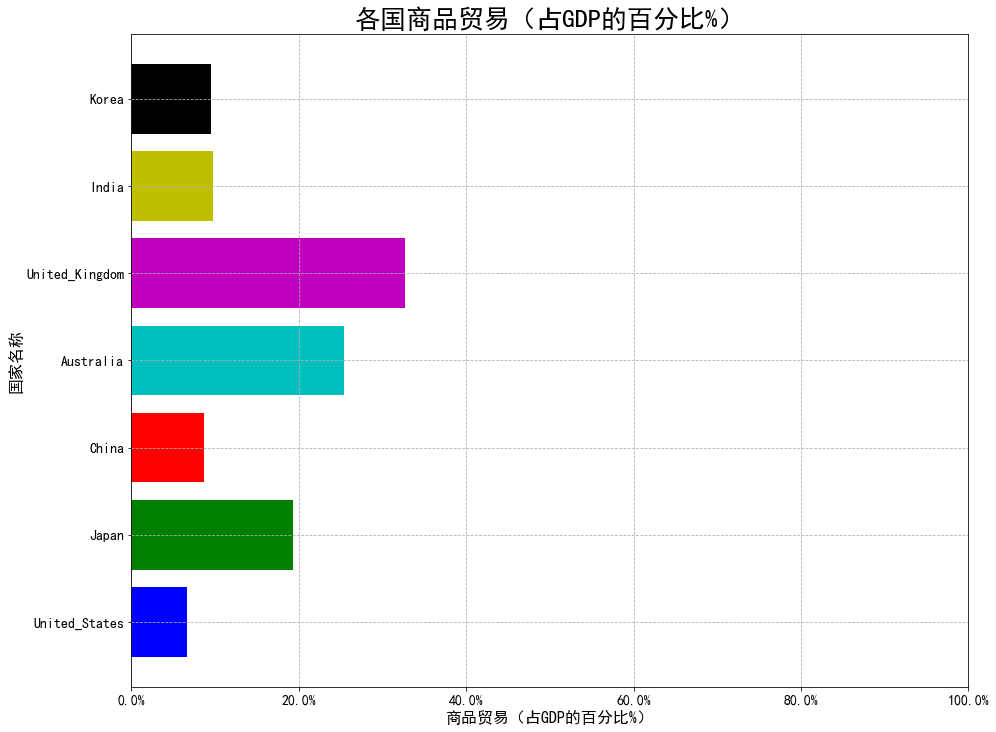

In [54]:
fig = plt.figure(figsize=(15,12))
rects = plt.barh(new_data.columns.values,new_data.values[0],color=['b','g','r','c','m','y','k'])

plt.title('各国商品贸易（占GDP的百分比%）',fontsize=26)

plt.ylabel('国家名称',fontsize=16)
plt.xlabel('商品贸易（占GDP的百分比%）',fontsize=16)

x_tick = np.linspace(0,100,6)
new_x_tick =[str(i)+'%' for i in x_tick]

plt.yticks(fontsize=14)
plt.xticks(x_tick,new_x_tick,fontsize=14)
# plt.xticks(scale_ls,index_ls) ## 可以设置坐标字

plt.grid(ls="--")
plt.xlim(0,100)

anim = animation.FuncAnimation(fig, animate2, frames=len(new_data), interval=40)
anim.save('im2.mp4', writer=writer)

plt.show()